<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/Linear_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pulp import *

## Linear Programming

Linear programming model (name, LpMaximize or LpMinimize)

In [ ]:
model = LpProblem("Cookies", LpMaximize)

Define Variables (name, minimum, maximum, LpContinous or LpInteger)

In [ ]:
x = LpVariable("Chocolate Chip", 0, None, LpContinuous)

In [ ]:
y = LpVariable("Sugar Cookie", 0, None, LpContinuous)

Define maximization problem

In [ ]:
model += 1.1*16*x + 0.8*24*y

Constraints

In [ ]:
model += 2*x + 4*y <= 42, "Sugar"
model += 3*x + 1*y <= 42, "Flour"
model += 16*x+ 24*y >= 50, "Cookies"

In [ ]:
model.solve()
for v in model.variables():
    print(v.name, "=", v.varValue)

Chocolate_Chip = 12.6
Sugar_Cookie = 4.2


Graph

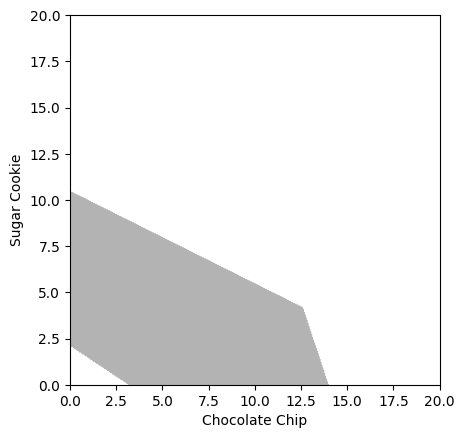

In [ ]:
d = np.linspace(0,20,400)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*x + 4*y <= 42) & (3*x + 1*y <= 42) & (16*x+ 24*y >= 50)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
plt.xlabel("Chocolate Chip")
plt.ylabel("Sugar Cookie")
plt.show()

## Integer Programming

Integer and more than 2 Variables

In [ ]:
model = LpProblem("Production", LpMaximize)

In [ ]:
x = LpVariable("Product X", 0, None, LpInteger)

In [ ]:
y = LpVariable("Product Y", 0, None, LpInteger)

In [ ]:
z = LpVariable("Product Z", 0, None, LpInteger)

In [ ]:
model += x + 20 + y + 70 + z + 10

In [ ]:
model += 30*x + 20*y + 35*z <= 2400, "Machine A Time"
model += 50*x + 35*y + 10*z <= 3000, "Machine B Time"
model += x + 20 >= 50, "Inventory X"
model += y + 70 >= 90, "Inventory Y"
model += z + 10 >= 20, "Inventory Z"

In [ ]:
model.solve()
for v in model.variables():
    print(v.name, "=", v.varValue)

Product_X = 30.0
Product_Y = 36.0
Product_Z = 22.0


Binary Variables

In [ ]:
days = 35
employees = 15

In [ ]:
model = LpProblem("Shift", LpMaximize)

In [ ]:
var_M = pulp.LpVariable.dicts('Morning', (range(days), range(employees)), 0, 1, 'Binary')
var_E = pulp.LpVariable.dicts('Evening', (range(days), range(employees)), 0, 1, 'Binary')
var_V = pulp.LpVariable.dicts('Vacation', (range(days), range(employees)), 0, 1, 'Binary')

In [ ]:
obj = None

for i in range(days):
    for j in range(employees):
        obj += var_M[i][j]+ var_E[i][j]

model += obj

In [ ]:
for j in range(employees):
    c = None
    c += var_M[i][j] + var_E[i][j] + var_V[i][j]
    model += c == 1

In [ ]:
m_emp = 3
e_emp = 5

for i in range(0, days):
    c = None
    d = None

    for j in range(employees):
        c += var_M[i][j]
        d += var_E[i][j]

    model += c >= m_emp
    model += d >= e_emp

In [ ]:
for j in range(employees):
    for i in range(days - 1):
        c = None
        c += var_M[i][j] + var_E[i+1][j]
        model += c <= 1

In [ ]:
for j in range(employees):
    for i in range(days - 1):
        if ((i + 1) % 7 != 0) and ((i + 2) % 7 != 0):
            c = None
            c += var_E[i][j] + var_M[i+1][j]
            model += c <= 1

In [ ]:
max_consecutive_days = 5

for j in range(employees):
    for i in range(0, days-6):
        c = None
        for w in range(7):
            c += var_M[i+w][j] + var_E[i+w][j]
        model += c <= max_consecutive_days

In [ ]:
for j in range(employees):
    for i in range(0, days-2):
        c = None
        c += var_V[i][j] - var_V[i+1][j] + var_V[i+2][j]
        model += c >= 0

In [ ]:
sched = []
time_worker = []

In [ ]:
model.solve()
for v in model.variables():
    time_worker.append(v.name)
    sched.append(v.varValue)

In [ ]:
sched_complete = pd.DataFrame(list(zip(time_worker, sched)), columns=["time_worker", "sched"])

In [ ]:
sched_complete.head()

,time_worker,sched
0,Evening_0_0,1.0
1,Evening_0_1,0.0
2,Evening_0_10,1.0
3,Evening_0_11,1.0
4,Evening_0_12,1.0


In [ ]:
split_data = sched_complete["time_worker"].str.split('_')
sched_complete['shift'] = split_data.apply(lambda x: x[0])
sched_complete['day'] = split_data.apply(lambda x: x[1])
sched_complete['worker'] = split_data.apply(lambda x: x[2])

In [ ]:
sched_complete

,time_worker,sched,shift,day,worker
0,Evening_0_0,1.0,Evening,0,0
1,Evening_0_1,0.0,Evening,0,1
2,Evening_0_10,1.0,Evening,0,10
3,Evening_0_11,1.0,Evening,0,11
4,Evening_0_12,1.0,Evening,0,12
...,...,...,...,...,...
4720,Vacation_9_5,1.0,Vacation,9,5
4721,Vacation_9_6,1.0,Vacation,9,6
4722,Vacation_9_7,1.0,Vacation,9,7
4723,Vacation_9_8,1.0,Vacation,9,8


Who is working on day 10? (sched=1)

In [ ]:
sched_complete.loc[(sched_complete["day"] == "10") & (sched_complete["sched"]== 1)  & (sched_complete["shift"]!= "Vacation")].sort_values(["shift", "worker"])

,time_worker,sched,shift,day,worker
16,Evening_10_1,1.0,Evening,10,1
1591,Evening_10_1,1.0,Evening,10,1
3166,Evening_10_1,1.0,Evening,10,1
21,Evening_10_14,1.0,Evening,10,14
1596,Evening_10_14,1.0,Evening,10,14
3171,Evening_10_14,1.0,Evening,10,14
23,Evening_10_3,1.0,Evening,10,3
1598,Evening_10_3,1.0,Evening,10,3
3173,Evening_10_3,1.0,Evening,10,3
26,Evening_10_6,1.0,Evening,10,6


Rerun with 10 employees. Can you have only 10 employees?